# Assignment - 2
## Name: Shuvendu Pritam Das
## Roll No: 23MT0389

`Context`: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The
objective is to predict based on diagnostic measurements whether a patient has diabetes using
<br>
1.Logistic Regression 
<br>
2.K-NN
<br>
3.Naive - Bayes
<br>
4.Decision Tree
<br>
5.Support Vector Machine

`Content` : Several constraints were placed on the selection of these instances from a larger database. In particular,
all patients here are females at least 21 years old.
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\shuve\Desktop\ML Lab\Assignment-2\diabetes_dataset.xlsx")

In [3]:
df.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0


## Exploring Data Set 

In [4]:
df.shape

(768, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


## EDA (Exploratory Data Analysis) 

In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Outcome(Target Variable)

In [7]:
df.iloc[:,7].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

It means it is a `Binary Classification` Technique.

It means it is an `unbalanced` data set. So, for final classification purpose, we will use `weighted voting`, where `weight` will be equal to `inverse of no. of data in that perticular class`.

## Preparation of Data for Claasification 

In [10]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

`No` null value is present in `any` feature and `outcome`

   ###  Normalization

In [11]:
df_n = (df - df.min())/(df.max() - df.min())

In [12]:
df_n.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can observe that `min` abd `max` of all features are now `0` & `1` respectively.

In [13]:
X_n = df_n.iloc[:,0:6]
Y_n = df_n.iloc[:,7]

In [14]:
print(X_n.head(2))
Y_n.head(2)

    Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0  0.743719       0.590164       0.353535      0.0  0.500745   
1  0.427136       0.540984       0.292929      0.0  0.396423   

   DiabetesPedigreeFunction  
0                  0.234415  
1                  0.116567  


0    1.0
1    0.0
Name: Outcome, dtype: float64

## Univariate Analysis

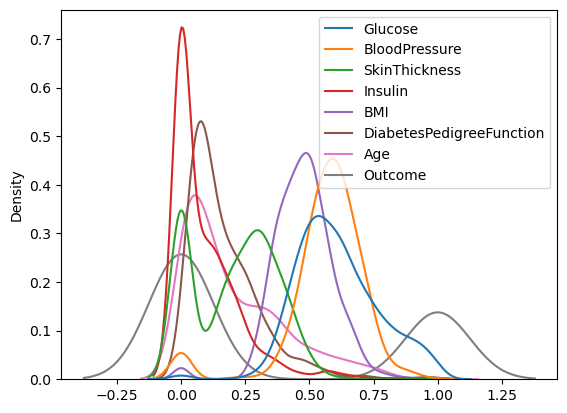

In [25]:
sns.kdeplot(df_n)
plt.show()

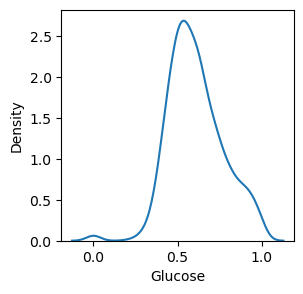

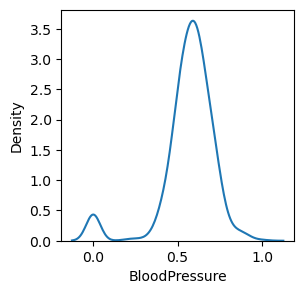

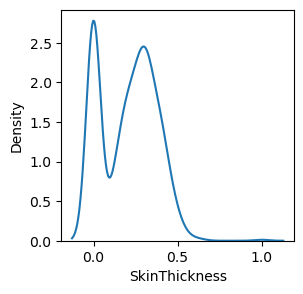

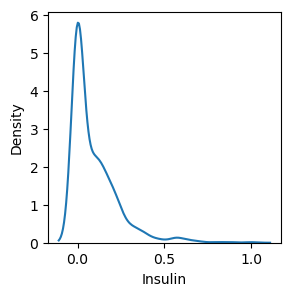

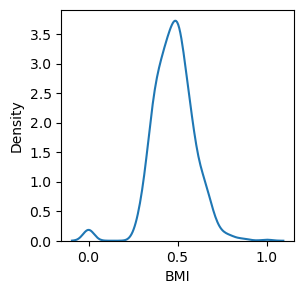

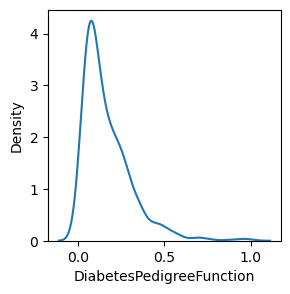

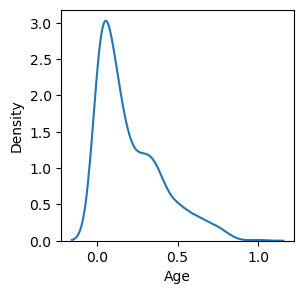

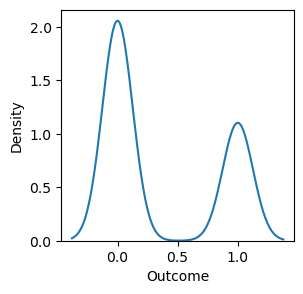

In [23]:
for i in range(len(df_n.columns)):
    plt.figure(figsize=(3,3))
    sns.kdeplot(df_n.iloc[:,i])
    plt.show()

## Multivariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


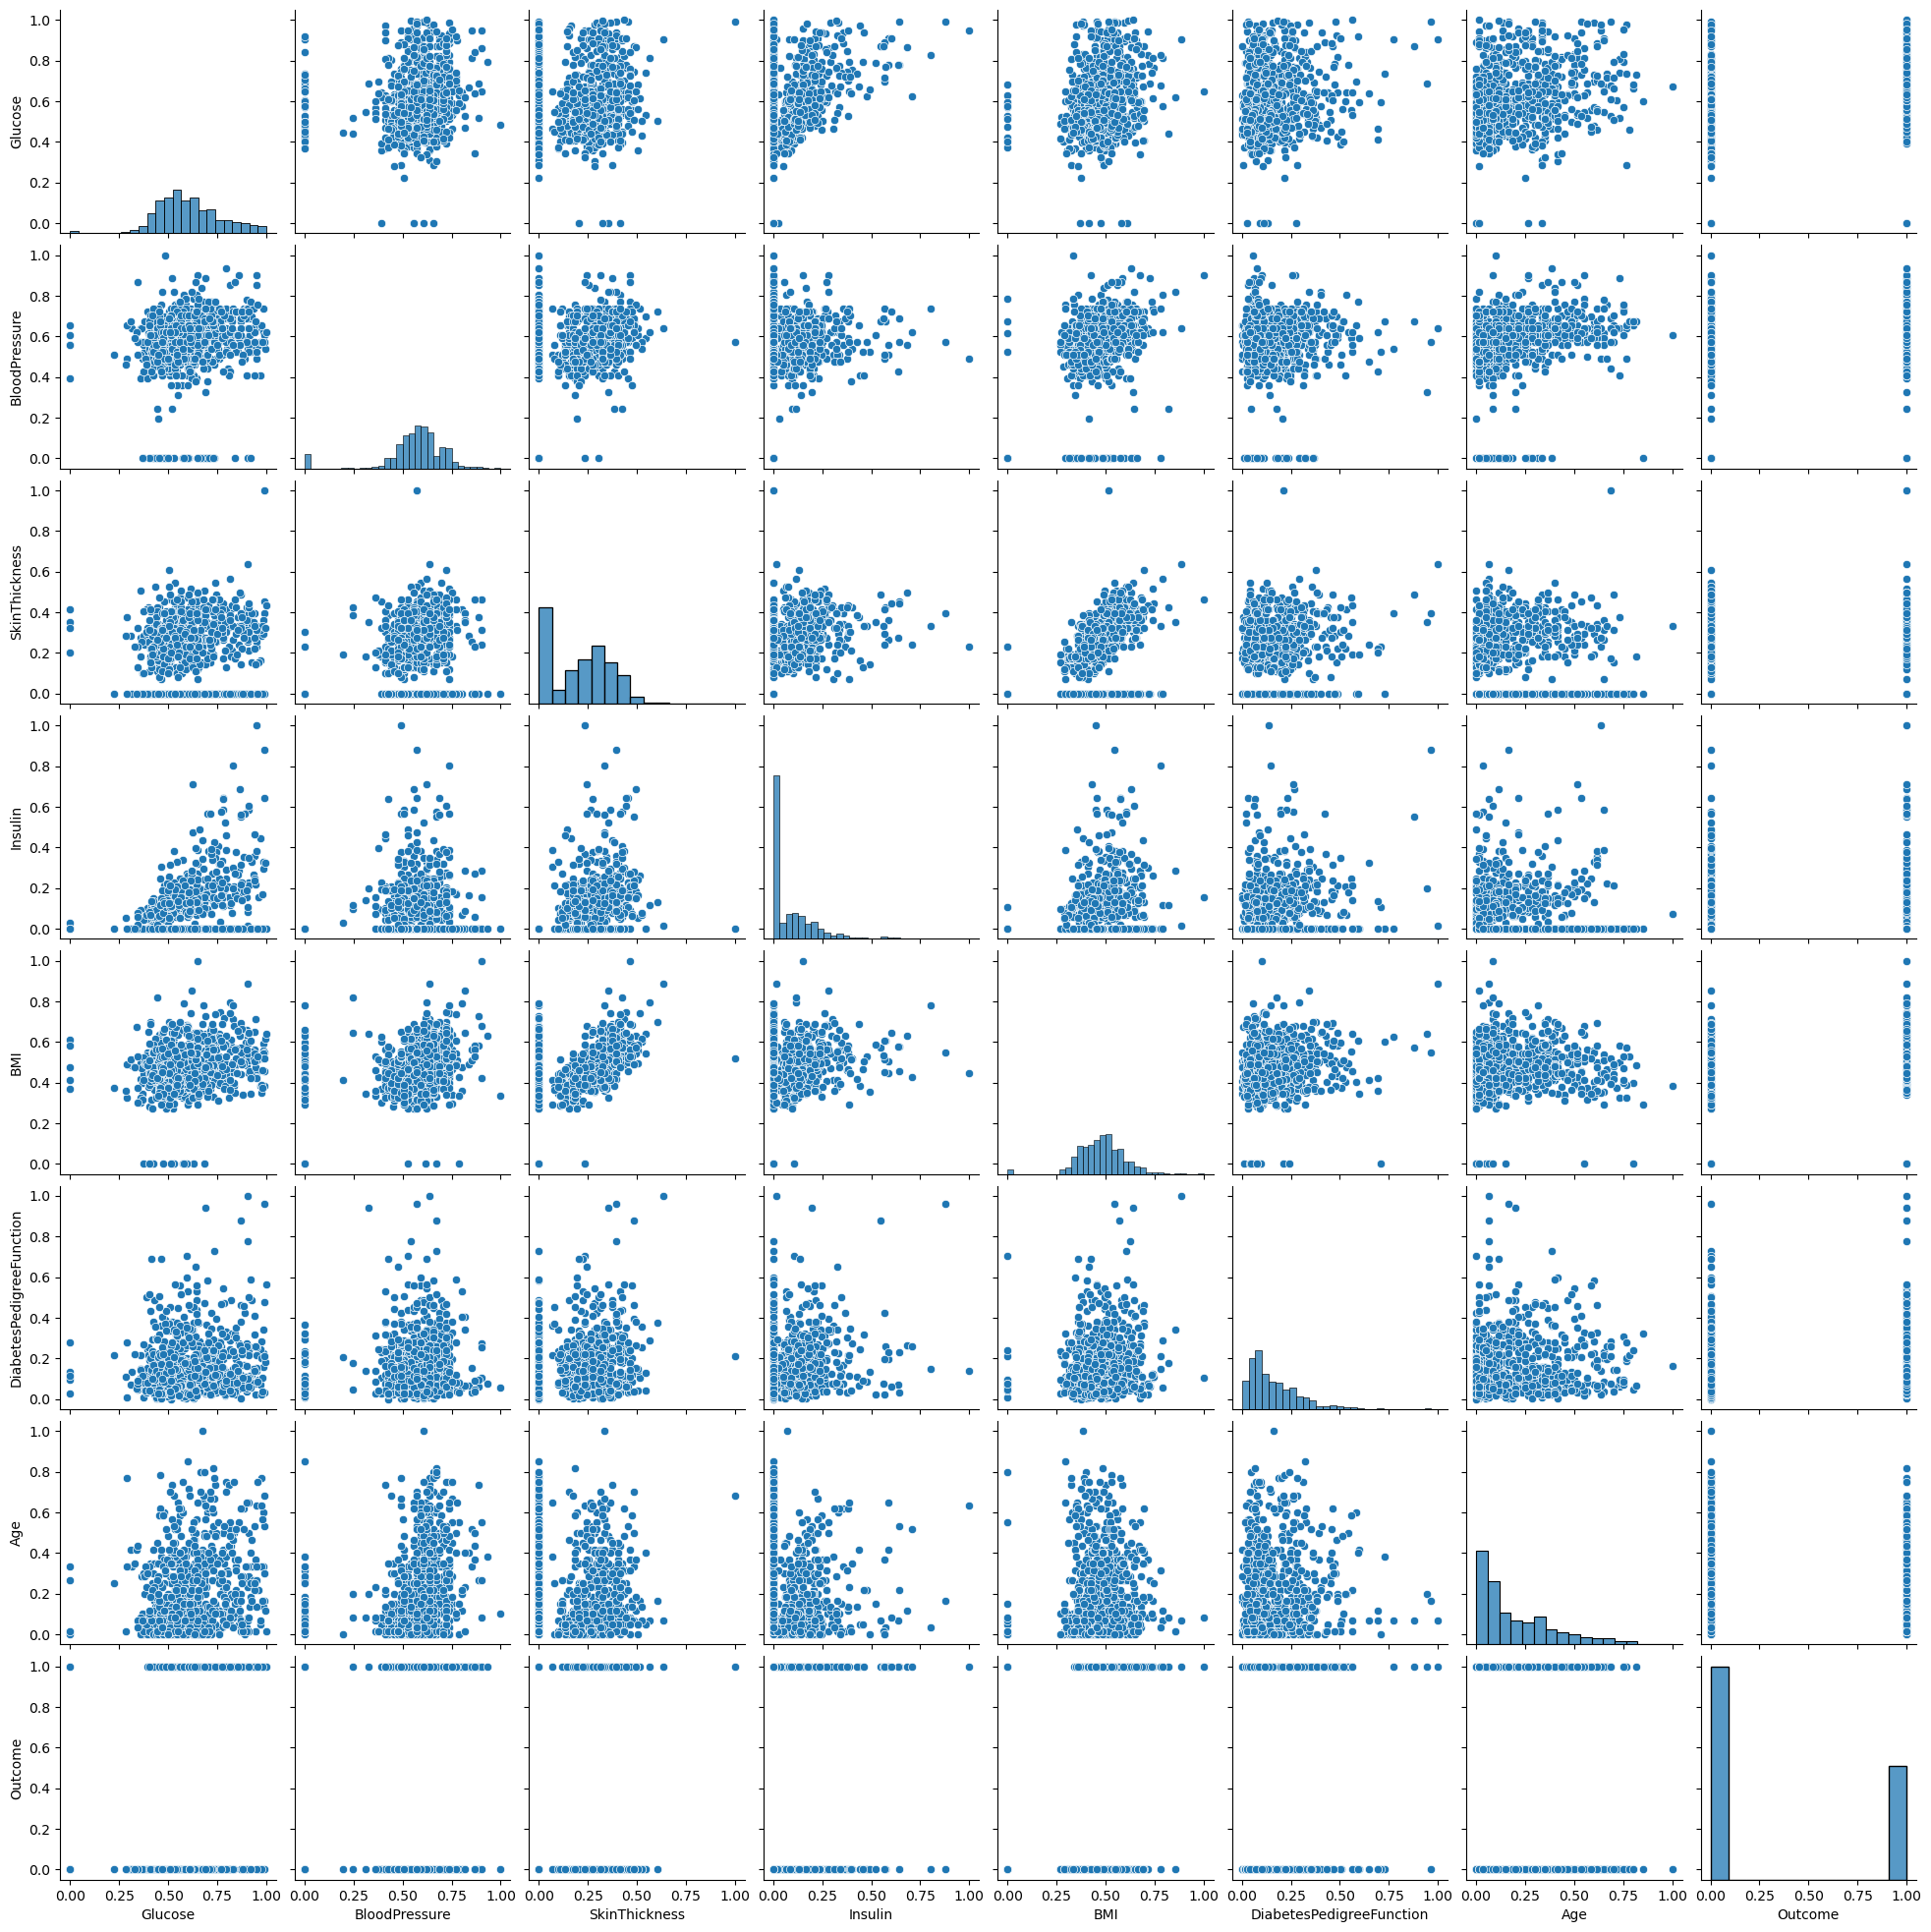

In [29]:
sns.pairplot(df_n)
plt.show()

### Checking of Independency of Features 

In [26]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


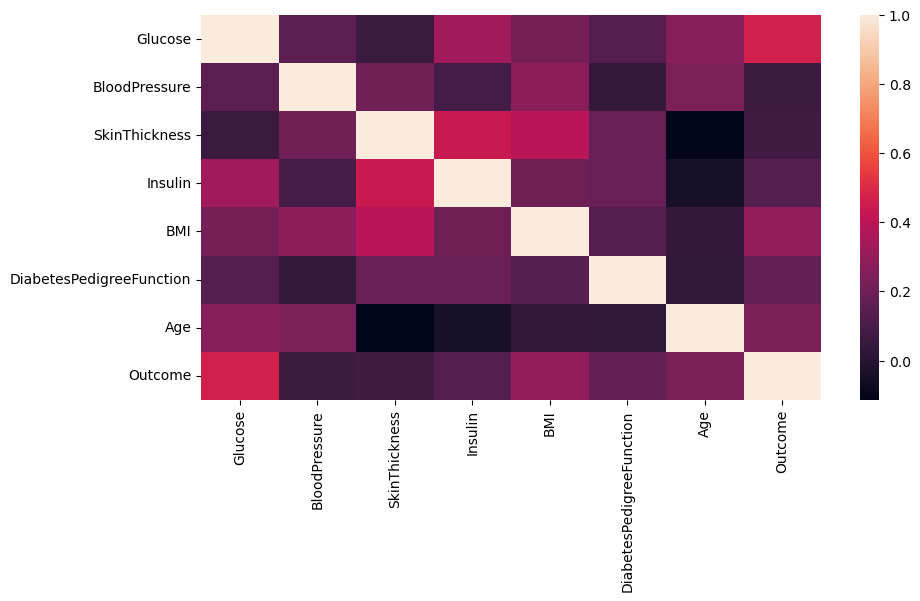

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.show()

There is `no` `Pearson Correlaton Coefficient` exists, whose value is not `greater than` `0.75` or n0t `less than -0.75`.This shows that `no - Multi Colinearity Exists`

## Creating Test and Train data 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_n,Y_n,test_size = 0.2, random_state= 10)

In [ ]:
print(X_Train.shape,X_Test.shape,Y_Train.shape,Y_Test.shape)

# Classification Using `Logistic Regression`

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_Logistic  = LogisticRegression()
clf_Logistic.fit(X_Train,Y_Train)

In [ ]:
Y_Pred_Logistic = clf_Logistic.predict(X_Test)

#### Probability of x that will fall in `class-0` or `class-1` 

In [ ]:
probability_Logistic = pd.DataFrame(clf_Logistic.predict_proba(X_Test))
probability_Logistic.head()

### Predicted Class (With Default Value = `0.5`)

In [ ]:
Y_Pred_Logistic ## By default cutoff value is 0.5

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(np.linspace(1,154,154),probability_Logistic[1])
plt.scatter(np.linspace(1,154,154),Y_Test)
plt.scatter(np.linspace(1,154,154),Y_Pred_Logistic)
plt.show()

### Assumptions Validation 

#### Test of Binary Dependent Variable (Dichotomous)

In [ ]:
df_n.iloc[:,7].value_counts()

#### Test of Independency of features ( No / Little `Multi Collinearity`)

In [ ]:
plt.figure(figsize=(10,3))
sns.heatmap(df_n.iloc[:,0:6].corr())
plt.show()

#### Linear relationship of continuous independent variables to log odds

In [ ]:
log_odds = np.log(probability_Logistic/(1-probability_Logistic))
for i in range(len(X_Test.columns)):
    plt.figure(figsize=(15,5))
    plt.scatter(log_odds[1],X_Test.iloc[:,i],label= X_Test.columns[i] )
    plt.legend()
    plt.show()

# Classification Using `K- Nearest Neighbour` with `Hyper Parameter Tuning` using `Random Search CV`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
knn = KNeighborsClassifier()
param_dist_knn = {
    "weights": ['uniform','distance'], # checking for different `weight` conditions
    "n_neighbors":randint(1,100), # checking for different values of `n'
    "p":[2,1],# 2 is for `Euclidean` distance and 1 is for `Manhattan` distance
}
clf_knn = RandomizedSearchCV(knn,param_dist_knn)
clf_knn.fit(X_Train,Y_Train)
print("Tuned Parameters: {}".format(clf_knn.best_params_))
print("Best score is {}".format(clf_knn.best_score_))

In [ ]:
Y_Pred_Knn=clf_knn.predict(X_Test)
Y_Pred_Knn

### probability of x wil fall in `class-1 ` and `class-2` 

In [ ]:
probability_knn=pd.DataFrame(clf_knn.predict_proba(X_Test))
probability_knn.head(5)

# Classification Using `Decison Tree` with `Hyper Parameter Tuning` using `Random Search CV`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
d_tree = DecisionTreeClassifier()
a = np.linspace(1,1000,10000)
b = np.linspace(1,1000,10000)
for i in range(len(a)):
    for j in range(len(b)):
        param_dist_tree = {
             'criterion' : ['gini','entopy','logloss'],
             'class_weight':[{0:a[i],1:b[j]}]
}   
clf_d_tree = RandomizedSearchCV(d_tree,param_dist_tree)
clf_d_tree.fit(X_Train,Y_Train)
print('tuned parameter:',(clf_d_tree.best_params_),'\n','best score:',(clf_d_tree.best_score_))

In [ ]:
Y_Pre_d_Tree = clf_d_tree.predict(X_Test)
Y_Pre_d_Tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion= 'gini', class_weight= {0: 100, 1: 200},).fit(X_Train,Y_Train)
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(150,100))
plot_tree(decision_tree)
plt.show()

# Classification Using `Naïve Bayes`

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
clf_Naive_Bayes =BernoulliNB().fit(X_Train,Y_Train)

In [ ]:
Y_Pre_Naive_Bayes = clf_Naive_Bayes.predict(X_Test)
Y_Pre_Naive_Bayes

# Classification Using `Support Vector Machine` with `Hype_Parameter` Optimization

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_svm = {
    'C' : np.linspace(0.001,10,10000)
}
clf_svm = RandomizedSearchCV(SVC(),param_svm)
clf_svm.fit(X_Train,Y_Train)
print('tuned parameter:',(clf_svm.best_params_),'\n','best score:',(clf_svm.best_score_))

In [ ]:
Y_Pred_SVM = clf_svm.predict(X_Test)
Y_Pred_SVM

# Prediction using deferrent Classification Techniques 

In [ ]:
Y_Predicted = pd.DataFrame(
    { 'Y_True' : Y_Test,
     'Logistic Regression' : Y_Pred_Logistic,
     'K-NN' : Y_Pred_Knn,
     'Naive Bayes' : Y_Pre_Naive_Bayes,
     'Decison Tree' : Y_Pre_d_Tree,
     'SVM' : Y_Pred_SVM
}
)
Y_Predicted.head().reset_index(drop = True)

# Analysis of `Accuracy`,`Confusion Matrix` and `AUC` for each Classifification Techniques

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

## Comparison of `Accuracy` 

In [ ]:
Accuracy = pd.DataFrame([['Logistic_Regression',accuracy_score(Y_Test,Y_Pred_Logistic)],
                         ['Naive Bayes',accuracy_score(Y_Test,Y_Pre_Naive_Bayes)],['K-NN',accuracy_score(Y_Test,Y_Pred_Knn)],
                         ['Decesion Tree',accuracy_score(Y_Test,Y_Pre_d_Tree)],['SVM',accuracy_score(Y_Test,Y_Pred_SVM)]])
Accuracy.rename(columns= {0:'Claasification Techniques',1:'Accuracy'})

## `Confusion Matrix`

In [ ]:
Confusion_Matrix = pd.DataFrame([
    ['Logistic_Regression',confusion_matrix(Y_Test,Y_Pred_Logistic).ravel()],
    ['Naive Bayes',confusion_matrix(Y_Test,Y_Pre_Naive_Bayes).ravel()],
    ['K-NN',confusion_matrix(Y_Test,Y_Pred_Knn).ravel()],
    ['Decesion Tree',confusion_matrix(Y_Test,Y_Pre_d_Tree).ravel()],
    ['SVM',confusion_matrix(Y_Test,Y_Pred_SVM).ravel()]])
(Confusion_Matrix.rename(columns={0: 'Classification Techniques', 1: 'tn, fp, fn, tp'}))

### Logistic Regression 

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pred_Logistic)).plot()

### K-NN

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pred_Knn)).plot()

### SVM 

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pred_SVM)).plot()

### Naive Bayes 

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pre_Naive_Bayes)).plot()

### Decision Tree 

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_Test,Y_Pre_d_Tree)).plot()

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_logistic, tpr_logistic, _ = roc_curve(Y_Test,Y_Pred_Logistic)
fpr_knn, tpr_knn, _ = roc_curve(Y_Test,Y_Pred_Knn)
fpr_naivebayes, tpr_naivebayes, _ = roc_curve(Y_Test,Y_Pre_Naive_Bayes)
fpr_decisiontree, tpr_decisiontree, _ = roc_curve(Y_Test,Y_Pre_d_Tree)
fpr_svm, tpr_svm, _ = roc_curve(Y_Test,Y_Pred_SVM) 

In [ ]:
plt.plot(fpr_logistic,tpr_logistic, label ='logistic',color = 'red')  
plt.plot(fpr_knn, tpr_knn,label = 'knn',color = 'blue')
plt.plot(fpr_decisiontree, tpr_decisiontree ,label = 'decision tree', color = 'green') 
plt.plot(fpr_svm, tpr_svm, label = 'svm', color ='black') 
plt.plot(fpr_naivebayes, tpr_naivebayes, label = 'naivebayes', color ='pink') 
plt.legend()
plt.title('ROC- CUrve')
plt.show()

## AUC Score 

In [ ]:
auc_matrix = pd.DataFrame([
    ['Logistic_Regression',auc(fpr_logistic,tpr_logistic)],
    ['Naive Bayes',auc(fpr_naivebayes,tpr_naivebayes)],
    ['K-NN',auc(fpr_knn,tpr_knn)],
    ['Decesion Tree',auc(fpr_decisiontree,tpr_decisiontree)],
    ['SVM',auc(fpr_svm,tpr_svm)]])
(auc_matrix.rename(columns={0: 'Classification Techniques', 1: 'auc_score'}))

## Interpreatation: 

 We can observe that `Support Vector Classifier` is giving `more` `Accuracy` and having `maximum` `AUC-Score`. It means the best one, which should be choosen `may` be `SVM - Claasifier`.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements `whether a patient has diabetes`. It means the ultimate goal is to choose that classification technique, which predicts `less` number of `no - diabetes`, which is actually `false`. It means the, we should choose that classification technique, which gives `minimum` `False-Negative` values.

From the confusion matrix, we can observe that `Decision-Tree` Claasification technique is giving `less` number of `false-negative` values.So, it is better to go for it.